# Generating Chirp

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polynomialPhase(coeffs:list,t:int)->int:
    """
    Generate the polynomial phase 
    """
    total = 0
    for i in range(1,len(coeffs)+1):
        total += coeffs[i-1]*(t**i/math.factorial(i))
    return total

In [3]:
def chirp(coeffs:list,nS:int,f:int)->list:
    """
    Generate a sample chirp given coeffs, number of samples and frequency 
    """
    outer = []
    for n in range (0,nS):
        temp = cmath.exp(2j*math.pi*(polynomialPhase(coeffs,n/f)))
        outer.append(temp)
    return outer

In [4]:
nSamples = 10000
samplingFrequency = 2000
def plot_chirp(coeffs:list)->list:
    p = chirp(coeffs,nSamples,samplingFrequency)
    points = [i.real for i in p]
    plt.plot(points)
    return p

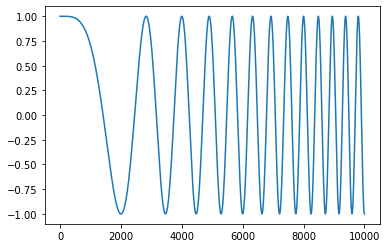

In [5]:
p = plot_chirp([0,1])

# Generating White Noise

In [6]:
def complexWhiteNoise(nS:int)->list:
    realDist = np.random.normal(0,1/math.sqrt(2),nS)
    imgDist = np.random.normal(0,1/math.sqrt(2),nS)
    return realDist + imgDist*1j

In [7]:
snr = 10
whiteNoisePoints = complexWhiteNoise(nSamples)/(10**(snr/20))
noisyPoints = p + whiteNoisePoints

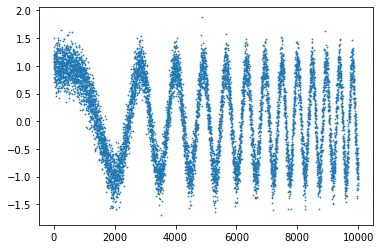

In [8]:
plt.scatter(range(0,len(noisyPoints)),noisyPoints.real,s=0.5)

# Normalizing 

In [9]:
def normalize(v:list)->list:
    return v / np.linalg.norm(v)

In [10]:
def normalizedMF(signal:list,template:list)->list:
    return np.correlate(normalize(signal),normalize(template),mode="full")

In [11]:
plot_n = normalizedMF(np.array(noisyPoints),np.array(p))

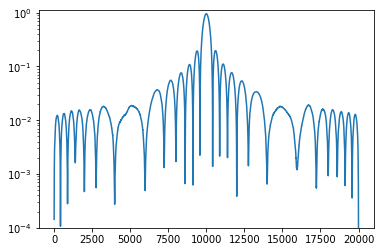

In [12]:
plt.plot([abs(i) for i in plot_n])
plt.yscale("log")
plt.ylim(10**-4, 1.1);

# Concatenate Matched Filter Outputs

In [13]:
def allAbsMFOutputs(signal:list,template:list)->list:
    outputs = [normalizedMF(signal,i) for i in template]
    return abs(np.concatenate(outputs))

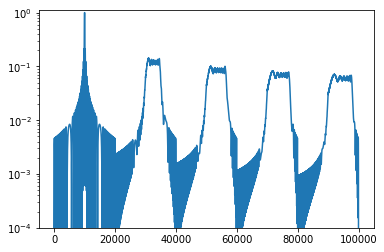

In [17]:
list_of_chirps = (
            chirp([0,1],nSamples,samplingFrequency),
            chirp([0,2],nSamples,samplingFrequency),
            chirp([0,3],nSamples,samplingFrequency),
            chirp([0,4],nSamples,samplingFrequency),
            chirp([0,5],nSamples,samplingFrequency)
        )
plt.plot(allAbsMFOutputs(chirp([0,1],nSamples,samplingFrequency),list_of_chirps));
plt.yscale("log")
plt.ylim(10**-4, 1.1);

# Real-Life Values

In [15]:
param_dict = {"Air Mode 1":[9750,1],"Air Mode 2":[9750,30],"Air Mode 3":[9750,14],"Air Mode 4":[9750,29],
               "Weather Mode 1":[9500,382],"Weather Mode 2":[9500,131],"Weather Mode 3":[9500,1000],
               "Weather Mode 4":[9500,375],"Weather Mode 5":[9500,300],"Marine Mode 1":[9410,400],
               "Marine Mode 2":[9410,111],"Marine Mode 3":[9410,440],"Marine Mode 4":[9410,500],
               "Marine Mode 5":[9410,139],"Marine Mode 6":[9410,50]}

In [16]:
samplingFrequency = 1200
nSamples = 10000